In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import mysql.connector

cnx = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="yourpass",
    database = "ecom")

cur = cnx.cursor(buffered=True)

List all unique cities where customers are located.

In [3]:
query = "select distinct customer_city from customers group by customer_city;"
cur.execute(query)
unique_cities_where_customers_are_located = cur.fetchall()
dfunique_cities_where_customers_are_located = pd.DataFrame(unique_cities_where_customers_are_located)
dfunique_cities_where_customers_are_located

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


Count the number of orders placed in 2017.

In [4]:
cur.execute("select count(order_purchase_timestamp) from orders where year(order_purchase_timestamp) = 2017;")
noof_orders_placed_in_2017 = cur.fetchall()
thetext = f"Count the number of orders placed in 2017. {noof_orders_placed_in_2017[0][0]}"
thetext

'Count the number of orders placed in 2017. 45101'

Find the total sales per category.

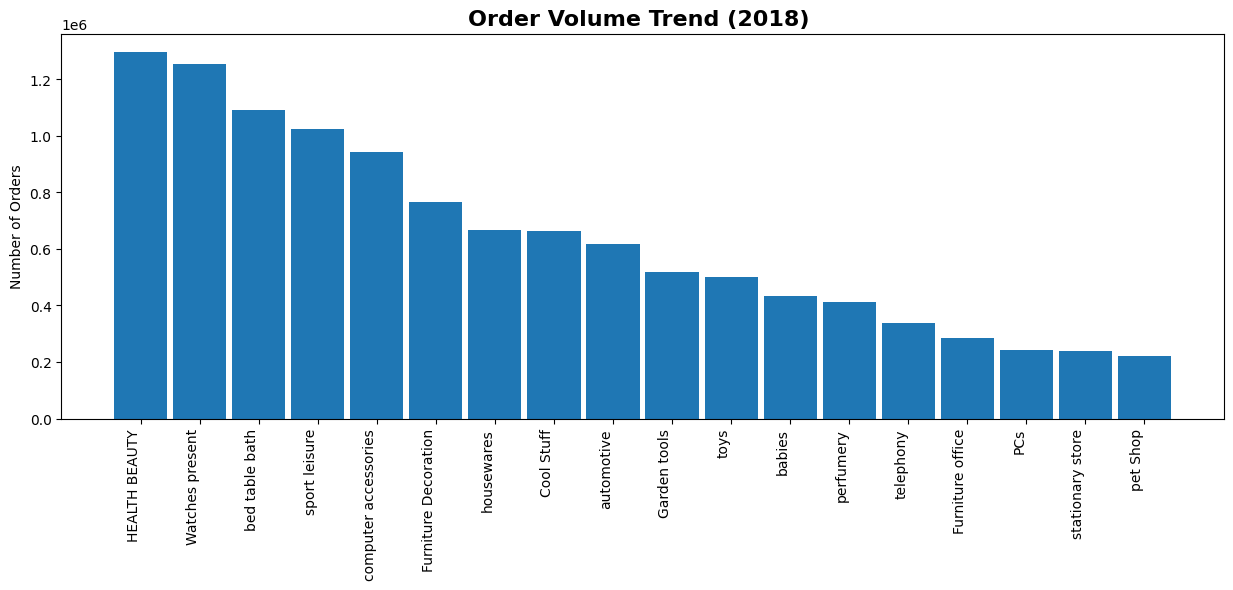

In [5]:
cur.execute("""SELECT p.product_category, round(SUM(order_items.price),2) as `sales per category`
FROM
products AS p CROSS JOIN order_items ON p.product_id = order_items.product_id
cross join payments as py on py.order_id = order_items.order_id
GROUP BY p.product_category;""")

sales_per_category = cur.fetchall()

dfsales_per_category = pd.DataFrame(sales_per_category , columns=['product_category','order items price'])
dfsales_per_category = dfsales_per_category.sort_values(by = 'order items price',ascending=False)
plt.figure(figsize=(15, 5))
plt.bar(dfsales_per_category['product_category'][:18] , dfsales_per_category['order items price'][:18],width=0.9)
plt.title('Order Volume Trend (2018) ', fontsize=16, fontweight='bold')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90, ha='right')
plt.show()

Calculate the percentage of orders that were paid in installments.

In [6]:
cur.execute("""
SELECT 
    ROUND(((SELECT 
                    COUNT(payment_installments)
                FROM
                    payments
                WHERE
                    payment_installments >= 1) / COUNT(payment_installments)) * 100,
            3) AS Order_percentage
FROM
    payments;
""")
percentage_of_orders_paid_in_installments = cur.fetchall()
percentage_of_orders_paid_in_installments[0][0]

Decimal('99.998')

Count the number of customers from each state. 

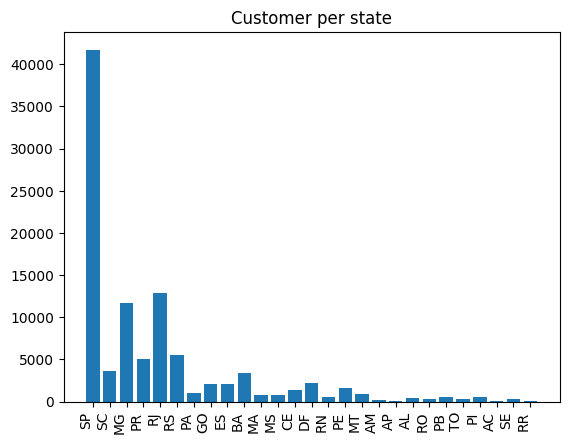

In [7]:
cur.execute("select customer_state , count(customer_id) as no_ofcustomer from customers group by customer_state;")
customer_per_state = cur.fetchall()
plt.bar([i[0] for i in customer_per_state],[i[1] for i in customer_per_state])
plt.title("Customer per state")
plt.xticks(rotation=90, ha='right')
plt.show()

Calculate the number of orders per month in 2018.

In [8]:
cur.execute("""
SELECT 
    MONTH(order_purchase_timestamp) as Month,
    COUNT(order_purchase_timestamp) as number_of_orders
FROM
    orders
WHERE
    YEAR(order_purchase_timestamp) = 2018
GROUP BY MONTH(order_purchase_timestamp)
ORDER BY MONTH(order_purchase_timestamp) ASC;
select * from orders;
""")

number_of_orders_per_month = cur.fetchall()
dfnumber_of_orders_per_month = pd.DataFrame(number_of_orders_per_month , columns=['Month','number of orders'])
dfnumber_of_orders_per_month

,Month,number of orders
0,1,7269
1,2,6728
2,3,7211
3,4,6939
4,5,6873
5,6,6167
6,7,6292
7,8,6512
8,9,16
9,10,4


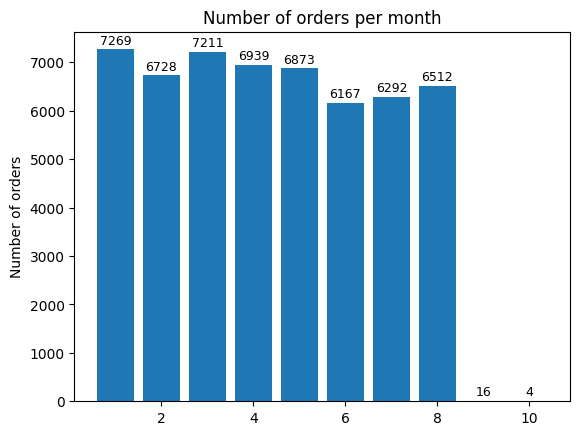

In [9]:
dfnumber_of_orders_per_month = pd.DataFrame(number_of_orders_per_month , columns=['month',"orders"])
dfnumber_of_orders_per_month
bars = plt.bar(dfnumber_of_orders_per_month['month'],dfnumber_of_orders_per_month['orders'])
plt.title("Number of orders per month")
plt.ylabel("Number of orders")
# plt.xlabel("Months")
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 50,          # offset
        int(height),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

In [ ]:
cnx = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="yourpass",
    database = "ecom")

cur = cnx.cursor(buffered=True)

Find the average number of products per order, grouped by customer city.

In [11]:
cur.execute("""
SELECT customers.customer_city , round(count(orders.order_id) / count(distinct orders.order_id),1) as avg_orders  FROM orders JOIN customers ON customers.customer_id = orders.customer_id group by customer_city;
""")

average_number_of_products_in_customer_city = cur.fetchall()
dfaverage_number_of_products_in_customer_city = pd.DataFrame(average_number_of_products_in_customer_city , columns=['City','no of products'])
dfaverage_number_of_products_in_customer_city

,City,no of products
0,abadia dos dourados,1.0
1,abadiania,1.0
2,abaete,1.0
3,abaetetuba,1.0
4,abaiara,1.0
...,...,...
4114,xinguara,1.0
4115,xique-xique,1.0
4116,zacarias,1.0
4117,ze doca,1.0


Calculate the percentage of total revenue contributed by each product category

In [17]:
cur.execute("""
select products.product_category , (round(sum(order_items.price)) / (select round(sum(price)) from order_items)) * 100  from order_items join products on order_items.product_id = products.product_id group by products.product_category;
""")

percentage_of_total_revenue_contributed_by_each_product_category = cur.fetchall()
print("Top 10 revenue contributed by each product category")
dfpercentage_of_total_revenue_contributed_by_each_product_category = pd.DataFrame(percentage_of_total_revenue_contributed_by_each_product_category , columns=['category','contribution'])
dfpercentage_of_total_revenue_contributed_by_each_product_category

Top 10 revenue contributed by each product category


,category,contribution
0,HEALTH BEAUTY,9.260697
1,sport leisure,7.269533
2,Cool Stuff,4.674129
3,computer accessories,6.709667
4,Watches present,8.865785
...,...,...
68,flowers,0.008167
69,Kitchen portable and food coach,0.029202
70,House Comfort 2,0.005592
71,CITTE AND UPHACK FURNITURE,0.032137


Identify the correlation between product price and the number of times a product has been purchased.

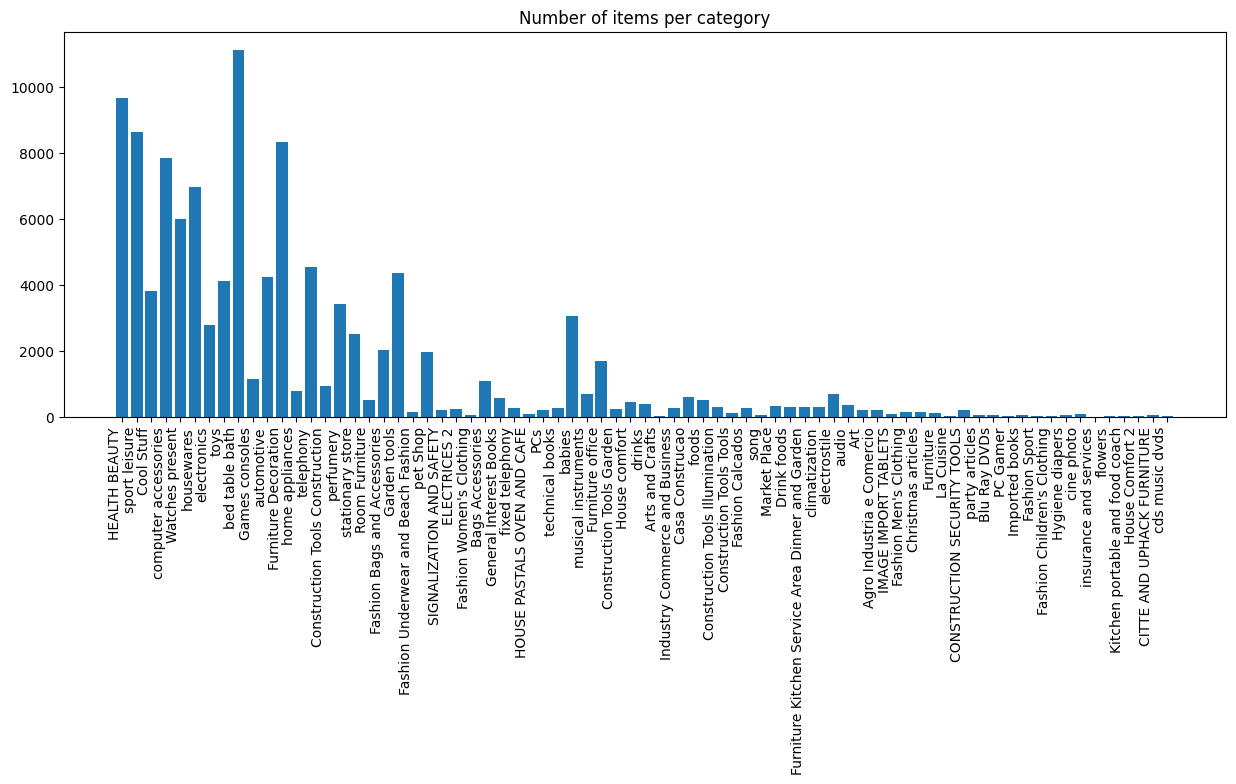

In [13]:
cur.execute("""
select products.product_category , count(order_items.product_id) as number_of_times_item , round(avg(order_items.price)
) from products join order_items on products.product_id = order_items.product_id group by products.product_category;
""")
correlation_between_product_price_and_the_number_of_times_a_product = cur.fetchall()
col = ["product_category","number_of_times_item","avg price"]
dfcorrelation_between_product_price_and_the_number_of_times_a_product = pd.DataFrame(correlation_between_product_price_and_the_number_of_times_a_product , columns=col)
dfcorrelation_between_product_price_and_the_number_of_times_a_product
plt.figure(figsize=(15, 5))
plt.bar(dfcorrelation_between_product_price_and_the_number_of_times_a_product['product_category'] , dfcorrelation_between_product_price_and_the_number_of_times_a_product['number_of_times_item'])
plt.xticks(rotation=90, ha='right')
plt.title("Number of items per category")
plt.show()

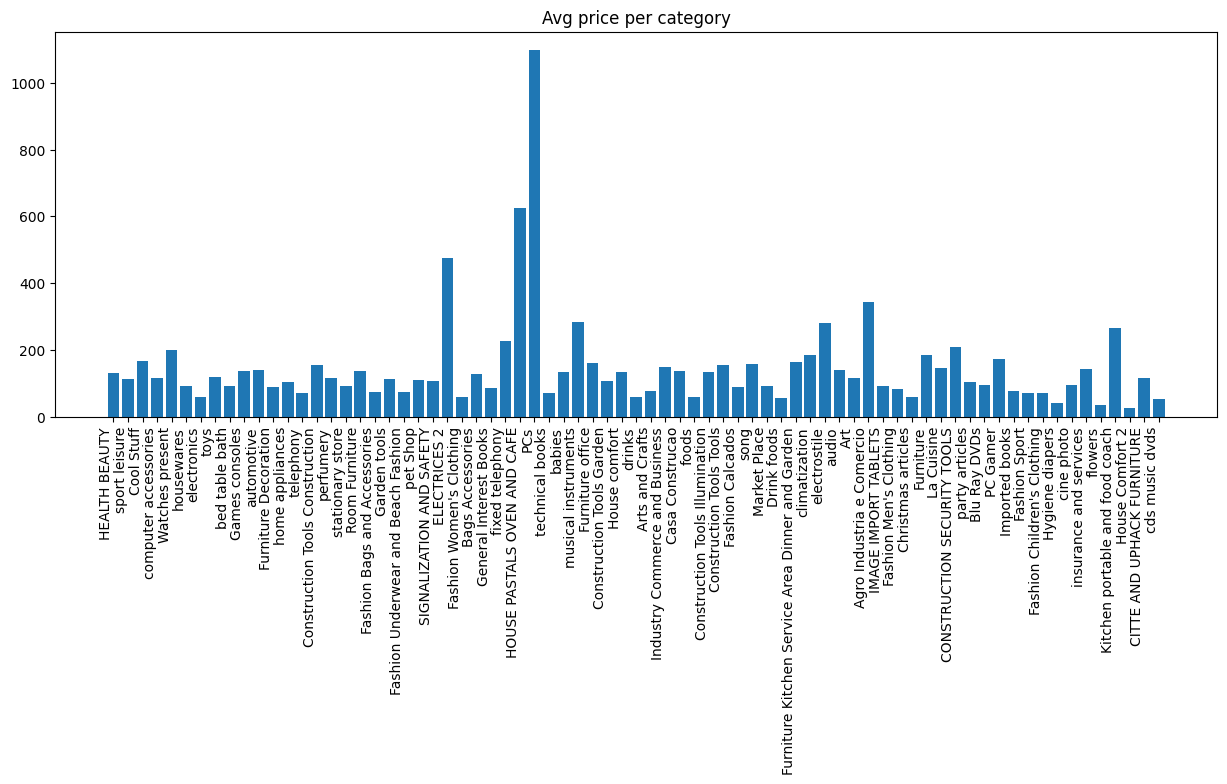

In [14]:
plt.figure(figsize=(15, 5))
plt.bar(dfcorrelation_between_product_price_and_the_number_of_times_a_product['product_category'] , dfcorrelation_between_product_price_and_the_number_of_times_a_product['avg price'])
plt.xticks(rotation=90, ha='right')
plt.title("Avg price per category")
plt.show()